# Table of Content

* [Project Description]
    * [Data Description]
    * [Goals]
    * [Steps]
* [Data Overview]
    * [Conclusion]
* [Pra-Processing Data]
    * [Rename Columns]
    * [Check diplicated data]
    * [Check missing values]
    * [Data types]
    * [Conclusion]
* [Analysis Data Eksploration (EDA)]
    * [Analyzed the distribution data with histogram]
    * [Calculate the total revenue]
    * [Analyzed data from top outlet]
        * [Find the total customer visit for top 10 outlets]
        * [Find out the average number of purchases for a certain period on top outlets]
        * [Find out the number of items sold on top outlets]
    * [Analyzed data from other outlets with the same parameters]
        * [Find the total customer visit for the other outlets]
        * [Find out the average number of purchases for a certain period on the other outlets]
        * [Find out the number of items sold on the other outlets]
* [Member and non-member loyalty program behavior]
    * [Loyalty program's behavior]
    * [Non-loyalty program's behavior]
* [Hypothesis testing]
* [Conclusion]
* [Recommendation]
* [Presentation Link]
* [Dashboard Link]

##  Description Project

Dalam menjalankan bisnis rantai (Franchise), sangat penting untuk mengetahui outlet-outlet mana saja yang menjadi sumber pendapatan tertinggi dan terendah. Salah satunya dengan menganalisis bagaimana penjualan dan pendapatan yang dihasilkan oleh outlet-outlet tersebut. Dengan begitu kita bisa menentukan outlet mana saja dan mensupport outlet tersebut sesuai dengan kebutuhan yang diperlukan.

###  Data description

Kita memiliki 2 data dalam bentuk `csv` yaitu `retail_dataset_us.csv` dan `product_codes_us.csv`.

berikut deskripsi dari setiap datanya:

`retail_dataset_us.csv` berisi:

- `purchaseId` - Purchase ID.
- `item_ID` - Item ID.
- `purchasedate` - Tanggal pembelian.
- `Quantity` — Jumlah item yang dibeli.
- `CustomerID` - Customer ID.
- `ShopID` - Shop ID.
- `loyalty_program` — Apakah customer member dari loyalty program? `1`: Ya, `0`: Tidak.

`product_codes_us.csv` berisi:

- `productID` - Product ID.
- `price_per_one`- Harga satuan (dalam Dolar).

### Goals
Hasil analisis ini akan ditujukan untuk para customer kita (dalam hal ini Franchisee) untuk mempertahankan dan juga mengembangkan outlet mereka, dampaknya bisnis Franchise yang kita punya akan terus berjalan, dan mungkin bisa berkembang lebih baik lagi dalam hal penjualan.

### Steps
Beberapa metrik yang akan dipelajari dalam analisis ini:

1. Menganalisis bagaimana outlet terbesar beroperasi.
2. Menganalisis bagaimana outlet yang lain beroperasi dengan parameter yang sama.
3. Bagaimana perilaku pelanggan dalam untuk setiap outlet.
4. Merumuskan metrik kinerja outlet penjualan dan menghitungnya untuk setiap outlet.

## Data Overview

Pada steps pertama kita akan mengimpor library yang dibutuhkan untuk analisis juga mengimpor data-data serta melihat informasi tentang data yang kita punya.

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st
import math as mth

In [2]:
#import data
retails = pd.read_csv('/datasets/retail_dataset_us.csv', parse_dates = ['purchasedate'])
retails

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


In [3]:
#import data
products = pd.read_csv('/datasets/product_codes_us.csv', sep=';')
products.head(10)

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
5,10124G,0.42
6,10125,0.42
7,10133,0.42
8,10135,0.42
9,11001,1.69


In [4]:
#looks the information of retails data
retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_ID          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   CustomerID       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   ShopID           105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


In [5]:
#looks the information of product data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


### conclusion

Dari melihat informasi datanya saja kita bisa mengetahui datanya memerlukan perbaikan. seperti pada nama kolom perlu diperbaiki agar memudahkan kita dalam melakukan analisis, lalu terdapat juga nilai yang hilang pada kolom `customer_id` pada table retails. kita akan melakukan perbaikan data pada tahap selanjutnya.

## Pra-processing Data

Pada Pra-pemrosesan data kita akan melakukan perbaikan pada data kita jika mendapati 


### Rename Columns

In [6]:
#fixed the columns name on retails data
retails.rename(columns = {'purchaseid' : 'purchase_id',
                        'item_ID' : 'product_id',
                        'Quantity' : 'quantity',
                        'purchasedate' : 'purchase_date',
                       'CustomerID':'customer_id',
                      'ShopID' : 'shop_id'}, inplace=True)
retails.columns

Index(['purchase_id', 'product_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id'],
      dtype='object')

In [7]:
#fixed the columns name on product data
products.rename(columns = {'productID' : 'product_id'}, inplace=True)
products.columns

Index(['product_id', 'price_per_one'], dtype='object')

kita telah memperbaiki nama-nama kolom pada kedua tabel. pada table retails dengan nama kolom `item_ID` saya ganti dengan nama kolom `product_id`. ini akan memudahkan kita bila saat analisis membutuhkan penggabungan data.

### Check duplicated data

In [8]:
#check duplicated data on retails data
retails.duplicated().sum()

1033

In [9]:
#check duplicated data on products data
products.duplicated().sum()

0

Terdapat nilai duplikat pada data retails sebanyak 1033 data, atau 0.09% dari total data. Meskipun duplikatnya sedikit tapi nilai duplikat ini bisa saja mempengaruhi hasil analisis, oleh karena ini kita akan mengahpus nilai duplikat tersebut.

In [10]:
#drop data duplicated on retails data
retails.drop_duplicates(inplace=True)

In [11]:
#looks the information data after deleting the duplicated data
retails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   float64       
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.4+ MB


Setelah menghapus duplikat data, sekarang terdapat 104302 data pada table retails untuk dianalisis, namun terlihat masih ada nilai yang hilang pada kolom customer_id yang akan kita perbaiki pada steps selanjutnya.

### Check missing Values

Steps ini untuk melihat nilai yang hilang sert memperbaikinya jika diperlukan.

In [12]:
#check missing values on retails data
retails.isna().sum()

purchase_id            0
product_id             0
quantity               0
purchase_date          0
customer_id        36148
loyalty_program        0
shop_id                0
dtype: int64

In [13]:
#check missing values on products data
products.isna().sum()

product_id       0
price_per_one    0
dtype: int64

Nilai yang hilang hanya terdapat pada data ratails di kolom customer_id, dengan jumlah nilai hilang sebesar 36210, atau sebanyak 34% dari data

In [14]:
#check how missing values on customer_id column
retails[retails['customer_id'].isna()]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


karena nilai yang hilang cukup banyak, maka saya akan mengganti nilai hilang pada kolom customer_id dengan nilai `0` dimana nilai `0` pada kolom tersebut berarti kostumer tersebut tidak mempunyai ID.

In [15]:
#replace NaN values with 0
retails['customer_id'] = retails['customer_id'].fillna(0)

In [16]:
#check missing values on retails data
retails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  float64       
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.4+ MB


Sekarang datanya sudah lengkap, tidak ada lagi nilai yang hilang pada data, dan tipe datanya juga sudah sesuai semuanya. Namun pada customer_id tipe datanya berupa float, ini sah-sah saja tetapi saya ingin menggantinya dengan tipe data integer agar lebih indah dipandang.

### Data types

In [17]:
#change data type of customer_id  from float to integer.
retails.customer_id = retails.customer_id.astype(int)

In [18]:
#looks the information data after fixed the data
retails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   product_id       104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  int64         
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 6.4+ MB


In [19]:
#looks the information data after fixed the data
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Sekarang semua data sudah siap untuk dianalisis lebih lanjut.

### Conclusion

Pada tahap pra-pemrosesan data ini kita telah melakukan perbaikan pada data kita seperti menghapus duplikat, memperbaiki missing values dan tipe data, serta melakukan perbaikan pada nama-nama kolom untuk memudahkan analisis.

## Analysis Data Eksploration (EDA)

In [20]:
#merge data
df = retails.merge(products, how='left', on='product_id')
df

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,1.65
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2.55
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,0.00
...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,1.25
104298,540247,21742,0,2017-01-05 15:56:00,21143,0,Shop 24,5.95
104299,538068,85048,1,2016-12-09 14:05:00,23657,1,Shop 16,6.95
104300,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,0.42


disini kita melakukan merge data untuk mendapatkan harga dari setiap produk, nantinya bisa dihitung untuk melihat jumlah penghasilan

In [21]:
#add new column 'total_price'
df['total_price'] = df['quantity'] * df['price_per_one']
df

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,1.65,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72,5.04
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2.55,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,0.00,0.00
...,...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,1.25,1.25
104298,540247,21742,0,2017-01-05 15:56:00,21143,0,Shop 24,5.95,0.00
104299,538068,85048,1,2016-12-09 14:05:00,23657,1,Shop 16,6.95,6.95
104300,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,0.42,4.62


sekarang kita memiliki jumlah harga yang di hasilkan oleh setiap user dalam kolom `total_price`. Namun terlihat pada kolom `quantity` ada nilai `0`, dimana nilai tersebut tidak masuk akal, tidak mungkin seseorang membeli barang namun tidak ada produknya.

In [22]:
#Add new columns that only contain dates
df['date'] = df['purchase_date'].dt.date
df.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,1.65,0.00,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72,5.04,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2.55,0.00,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,0.00,0.00,2017-02-13


saya menambahkan kolom date agar memudahkan kita untuk menganalisis data serta memvisualisasikan data nanti

In [23]:
#look into distribution data
df.describe()

,quantity,customer_id,loyalty_program,price_per_one,total_price
count,104302.000000,104302.000000,104302.000000,104302.000000,104302.000000
mean,7.883003,13729.314874,0.224464,2.065705,9.352132
std,329.565540,10100.257229,0.417231,3.726409,342.067302
min,-74216.000000,0.000000,0.000000,0.000000,-77184.640000
25%,0.000000,0.000000,0.000000,0.420000,0.000000
50%,2.000000,19423.000000,0.000000,1.250000,1.450000
75%,7.000000,21692.000000,0.000000,2.550000,9.350000
max,74214.000000,23962.000000,1.000000,175.000000,77182.560000


dari tabel distribusi data diatas kita bisa mengetahui terlihat adanya nilai negatif di kolom `quantity` yang menghasilkan nilai negatif juga pada kolom `total_price`. apakah nilai negatif ini adalah item yang return?

In [24]:
#look into quantity column with 0 value.
df[df['quantity'] == 0]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,1.65,0.0,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2.55,0.0,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,0.00,0.0,2017-02-13
5,538379,22965,0,2016-12-12 11:26:00,22805,1,Shop 20,1.85,0.0,2016-12-12
6,540468,22189,0,2017-01-07 13:55:00,0,0,Shop 0,2.31,0.0,2017-01-07
...,...,...,...,...,...,...,...,...,...,...
104281,538073,22439,0,2016-12-09 14:10:00,23495,1,Shop 22,0.65,0.0,2016-12-09
104282,543306,22898,0,2017-02-07 11:56:00,22365,1,Shop 18,1.65,0.0,2017-02-07
104283,543013,22266,0,2017-02-02 13:35:00,0,0,Shop 0,0.65,0.0,2017-02-02
104294,538349,22625,0,2016-12-10 14:59:00,0,0,Shop 0,0.00,0.0,2016-12-10


terdapat 32ribu lebih nilai 0 pada kolom `quantity` atau 31% dari jumlah data. Meskipun terlihat sangat banyak sekali namun nilai ini tidak masuk akal, dan dapat mempengaruhi hasil analisis, jadi saya akan menghapusnya nilai-nilai tersebut.

In [25]:
#look into negative values on quantity's column
df[df['quantity'] < 0]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
64,C539944,22776,-2,2016-12-23 11:38:00,20239,0,Shop 27,8.50,-17.00,2016-12-23
109,C542910,20726,-2,2017-02-01 15:38:00,23190,1,Shop 19,0.00,-0.00,2017-02-01
112,C542426,22418,-25,2017-01-28 09:32:00,19825,0,Shop 27,0.85,-21.25,2017-01-28
253,C539726,22791,-11,2016-12-21 14:24:00,22686,1,Shop 3,1.06,-11.66,2016-12-21
344,C544034,21878,-2,2017-02-15 11:28:00,20380,0,Shop 9,0.72,-1.44,2017-02-15
...,...,...,...,...,...,...,...,...,...,...
104132,C541650,M,-2,2017-01-20 11:44:00,0,0,Shop 0,0.19,-0.38,2017-01-20
104143,C540246,79320,-2,2017-01-05 15:43:00,18760,0,Shop 19,4.95,-9.90,2017-01-05
104180,C539467,22801,-2,2016-12-19 12:46:00,20723,0,Shop 13,3.39,-6.78,2016-12-19
104217,C540847,22197,-3,2017-01-11 17:35:00,19137,0,Shop 0,0.72,-2.16,2017-01-11


terdapat 2076 atau 1%-nya nilai negatif dari data pada kolom quantity. Dan setelah diteliti lagi sepertinya ini bukanlah nilai return barang dari customer. Oleh karena itu saya juga akan menghapus nilai tersebut agar hasil analisis ini tidak menjadi bias.

In [26]:
#delete 0 and negative values on quantity's column
df = df[df['quantity'] > 0]
df

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72,5.04,2016-12-14
7,541424,79321,1,2017-01-17 17:57:00,0,0,Shop 0,0.00,0.00,2017-01-17
10,537795,82494L,5,2016-12-08 13:03:00,22892,1,Shop 6,2.55,12.75,2016-12-08
11,541696,22197,4,2017-01-20 18:08:00,0,0,Shop 0,0.72,2.88,2017-01-20
...,...,...,...,...,...,...,...,...,...,...
104296,540154,22134,3,2017-01-05 11:30:00,0,0,Shop 0,0.42,1.26,2017-01-05
104297,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,1.25,1.25,2016-12-13
104299,538068,85048,1,2016-12-09 14:05:00,23657,1,Shop 16,6.95,6.95,2016-12-09
104300,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,0.42,4.62,2016-12-10


In [27]:
#look into distribution data after filtering
df.describe()

,quantity,customer_id,loyalty_program,price_per_one,total_price
count,69864.000000,69864.000000,69864.000000,69864.000000,69864.000000
mean,13.480004,16118.467694,0.248869,1.836918,15.514880
std,285.884978,8914.304420,0.432361,3.154644,298.717797
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18150.000000,0.000000,0.420000,1.450000
50%,5.000000,19986.000000,0.000000,1.250000,6.050000
75%,11.000000,21985.000000,0.000000,2.460000,12.750000
max,74214.000000,23962.000000,1.000000,175.000000,77182.560000


sekarang nilai-nilainya sepertinya sudah membaik dan masuk akal untuk melakukan analisis. namun masih ada pada kolom `total_price` terdapat nilai 0 dengan `quantity` 1. apakah produk tersebut memang bernilai 0 (gratis)?

In [28]:
#looks into the products data with the price of the products are 0
products[products['price_per_one'] == 0]

,product_id,price_per_one
34,16033,0.0
54,16207B,0.0
67,17011A,0.0
87,17091A,0.0
95,17165D,0.0
...,...,...
3141,DCGS0055,0.0
3142,DCGS0057,0.0
3145,DCGS0072,0.0
3146,DCGS0074,0.0


ternyata banyak sekali products dengan harga 0. saya akan mengasumsikan bahwa product-product tersebut adalah gratis yang diberikan oleh outlet.

sepertinya kita bisa mulai melakukan analisis dengan membuat histogram untuk melihat pesebaran datanya.

### Analyzed the distribution data with histogram

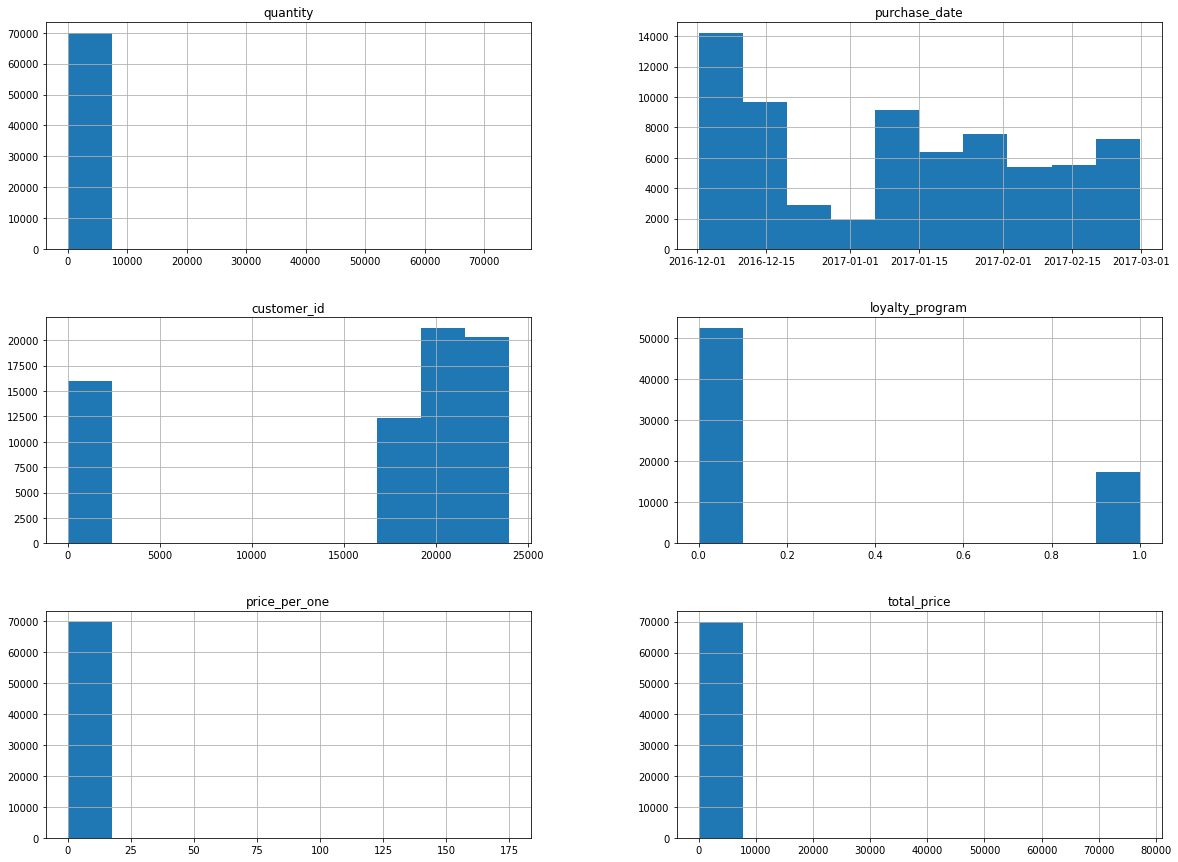

In [29]:
#looking the distribution data with histogram
df.hist(figsize= (20,15), bins= 10)
plt.show()

pada histogram diats kita bisa melihat bahwa:

1. pada kolom `quantity` datanya berkumpul paling banyak pada antara 1-8000 item dan terdapat 1 nilai dengan quantity yang paling besar sekitar lebih dari 70000 item.
2. pada purchase date puncaknya terdapat pada tanggal 1-12-206 hingga sekitar tangga 7-12-2016 ada sebanyak 140ribu transaksi.
3. untuk loyalty program ternyata paling banyak adalah customer non member dengan jumlah 50ribu cutomer dan member hanya sekitar 1800 customer di dalam data.
4. dalam data paling banyak harga satuan product dengan kisaran 0-23 dolar/product, namun juga ada yang paling tinggi hingga 175 dolar/product.
5. terakhir untuk total price atau harga yang didapat dari setiap customer paling banyak berkisaran di 0-8000 ribu dolar. dan ada juga nilai outlier yang total price dengan jumlah 80ribu dolar.

### Calculate the total revenue

In [30]:
#find the revenue for each outlet
shop_revenue = df.groupby('shop_id').agg({'total_price': 'sum'}).reset_index()
shop_revenue.sort_values(by='total_price', ascending=False).reset_index(inplace=True)
shop_revenue

,shop_id,total_price
0,Shop 0,106375.42
1,Shop 1,25074.96
2,Shop 10,31795.32
3,Shop 11,24014.87
4,Shop 12,21587.37
5,Shop 13,39911.36
6,Shop 14,25337.35
7,Shop 15,112186.68
8,Shop 16,21085.22
9,Shop 17,24409.03


In [31]:
#find the revenue for member and non member customers
loyalty_revenue = df.groupby('loyalty_program').agg({'total_price': 'sum'}).reset_index()
loyalty_revenue.sort_values(by='total_price', ascending=False)

,loyalty_program,total_price
0,0,814909.24
1,1,269022.36


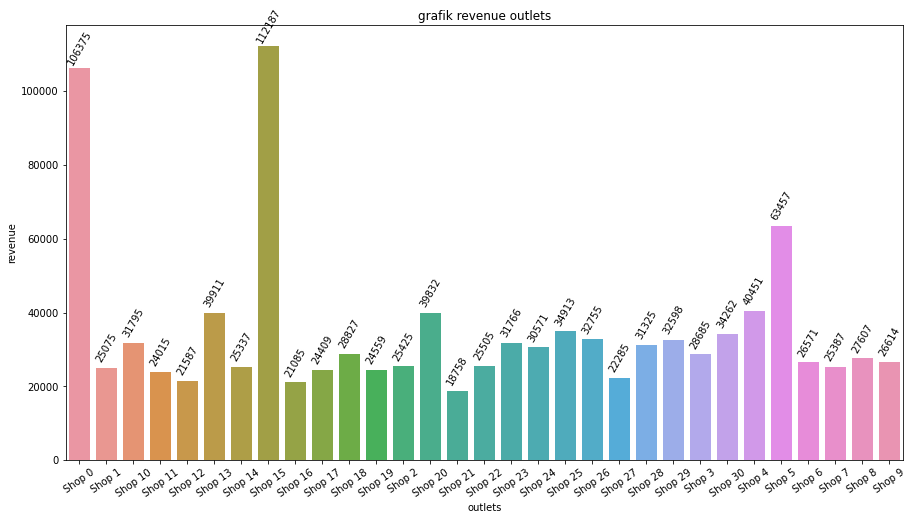

In [32]:
#visualize the number of average purchase based on the date
plt.figure(figsize= (15,8))
splot = sns.barplot(data=shop_revenue, x='shop_id', y='total_price')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20),rotation = 60, 
                   textcoords = 'offset points')
plt.xticks(rotation=35)
plt.xlabel('outlets')
plt.ylabel('revenue')
plt.title('grafik revenue outlets')
plt.show()

In [33]:
#create a new variable to see the revenue based on the date
date_group = df.groupby('date').agg({'total_price': 'sum'}).reset_index()
date_group.sort_values(by='total_price', ascending=False)

,date,total_price
32,2017-01-18,85314.88
5,2016-12-07,41842.00
29,2017-01-14,31735.14
13,2016-12-16,31707.05
26,2017-01-11,31612.32
...,...,...
30,2017-01-16,3854.39
42,2017-01-30,2993.90
18,2016-12-22,2964.36
54,2017-02-13,2840.37


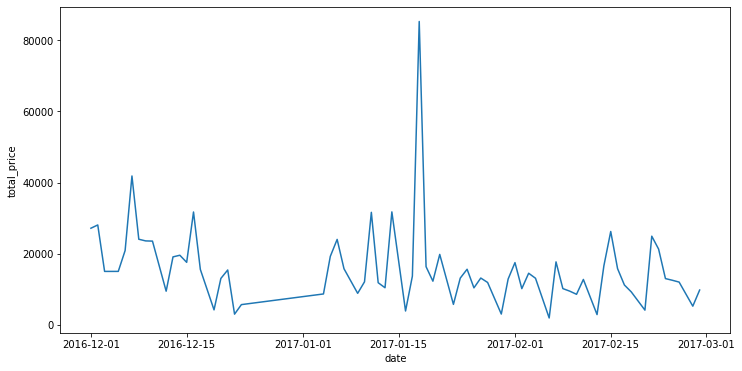

In [34]:
#visualize total revenue based on the date
plt.figure(figsize=(12,6))
sns.lineplot(data=date_group, x="date", y='total_price')
plt.show()

In [35]:
#products with the highest sale
product_sold = df.groupby('product_id').agg({'quantity' :'sum'}).reset_index()
product_sold.sort_values(by='quantity', ascending=False)

,product_id,quantity
1763,23166,74214
2505,85123A,10609
2113,84077,10126
382,21212,9325
2487,85099B,7616
...,...,...
2631,90059B,1
2346,84922,1
2344,84919,1
2634,90063A,1


product paling banyak terjual ada pada produk id `23166` dengan total penjualan 74214 item dan produk id `85123A` dengan 10609 item. namun seperti yang kita ketahui terdapat nilai outlier pada data dimana terdapat customer yang membeli produk secara ekstrem sehingga memunculkan kemiringan positif, mari kita buang outlier dan lihat kembali produk apa yang paling banyak laku terjual.

In [36]:
#filtering the data without outliers
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

df_out = (df['quantity'] >= Q1 - 1.5 * IQR) & (df['quantity'] <= Q3 + 1.5 *IQR)
df_out = df.loc[df_out]

In [37]:
#product with the highest sale without outlier
product_sold_out = df_out.groupby('product_id').agg({'quantity' :'sum'}).reset_index()
product_sold_out.sort_values(by='quantity', ascending=False)

,product_id,quantity
377,21212,2999
1712,22961,2547
2484,85123A,2406
1247,22469,2224
2305,84879,2112
...,...,...
2234,84707B,1
2232,84706D,1
2215,84661A,1
2204,84620,1


setelah outlier dihapus, kita mendapati produk id `21212` dengan penjualan terbanyak yaitu 2999 item, dan produk id `85123A` masih termasuk produk yang paling banyak terjual.

kita memiliki 30 outlet. Outlet yang paling banyak mendapatkan pendapatan yaitu dari outlet ke 15 (Shop 15) dengan total pendapatan 112186.68 dolar, dan yang paling sedikit ada di Shop 21 dengan totla pendapatan 18758.24 dolar.

Untuk pendapatan berdasarkan member loyalty program, customer dengan member mengumpulkan 269022.36 dolar sedangkan non-member mendapat 814909.24 dolar penghasilan. banyaknya pendapatan yang dihasilkan oleh customer non memebr dikarenakan memang jumlah non member lebih besar dari cutomer member.

lalu kita lihat total pendapatan paling tinggi pada tanggal 2017-01-18 dengan jumlah pendapatan 85314.88 dolar.

selanjutnya kita akan menganalisis bagaimana penjualan pada top 10 outlet yang kita punya.

### Analyze data from top outlet

Saya akan asumsikan bahwa top outlet adalah outlet dengan total pendapatan tertinggi. kita akan akan memilih hanya 10 outlet untuk masuk ke top outlet.

In [38]:
#create new variable for top 10 outlets
top_shop = df[df['shop_id'].isin(['Shop 0', 'Shop 1', 'Shop 10', 'Shop 11', 'Shop 12', 'Shop 13',
                             'Shop 14', 'Shop 15', 'Shop 16', 'Shop 17'])]
top_shop


,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
7,541424,79321,1,2017-01-17 17:57:00,0,0,Shop 0,0.00,0.00,2017-01-17
11,541696,22197,4,2017-01-20 18:08:00,0,0,Shop 0,0.72,2.88,2017-01-20
12,543647,21987,3,2017-02-10 19:49:00,18520,0,Shop 17,0.53,1.59,2017-02-10
16,539744,22300,5,2016-12-21 15:21:00,0,0,Shop 0,0.00,0.00,2016-12-21
17,541838,84949,11,2017-01-23 10:43:00,18595,0,Shop 14,1.45,15.95,2017-01-23
...,...,...,...,...,...,...,...,...,...,...
104293,540681,22227,1,2017-01-10 16:25:00,0,0,Shop 0,0.65,0.65,2017-01-10
104295,537886,22158,7,2016-12-09 09:49:00,21339,0,Shop 13,0.00,0.00,2016-12-09
104296,540154,22134,3,2017-01-05 11:30:00,0,0,Shop 0,0.42,1.26,2017-01-05
104297,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,1.25,1.25,2016-12-13


#### Find the total customer visit for top 10 outlet

In [39]:
#find the total visit of customers for each outlets.
total_visit_top = top_shop.groupby('shop_id').agg({'customer_id': 'count'}).reset_index()
total_visit_top.sort_values(by='customer_id', ascending=False)

,shop_id,customer_id
0,Shop 0,17648
7,Shop 15,2061
1,Shop 1,1973
5,Shop 13,1892
3,Shop 11,1865
6,Shop 14,1864
2,Shop 10,1728
9,Shop 17,1709
8,Shop 16,1548
4,Shop 12,1415


In [40]:
#find how many user on each outlets
top_shop.groupby('shop_id').agg({'customer_id': 'nunique'}).sort_values(by='customer_id', ascending=False)

,customer_id
shop_id,
Shop 15,116
Shop 11,113
Shop 17,113
Shop 0,112
Shop 14,112
Shop 1,111
Shop 13,105
Shop 10,96
Shop 12,93


Dari 116 customer di outlet Shop 0 terdapat 17648x user yang mengunjungi outlet tersebut. namun shop 15 memiliki paling banyak customer dengan 116 customers.

#### Find out the average number of purchases for a certain period on top outlet

kita akan mencari rata-rata pembelian yang dilakukan oleh customers selama 3 bulan pada 10 top outlets.

In [41]:
#grouping revenue and the average of puchases based on the date
top_date_group = top_shop.groupby('date').agg({'total_price': ['sum','mean'], 'quantity' : 'mean'}).reset_index()
top_date_group

date total_price              quantity
                       sum       mean       mean
0   2016-12-01    12718.62  12.194267   9.302972
1   2016-12-02    11403.78  18.633627  16.480392
2   2016-12-03     7464.47   9.192697   7.536946
3   2016-12-05     5129.13   9.191989   7.489247
4   2016-12-06    10126.93   7.440801   6.431301
..         ...         ...        ...        ...
63  2017-02-23     6118.61  10.014092   7.831424
64  2017-02-24     4359.64  10.209930   8.946136
65  2017-02-25     2877.27  10.349892   8.920863
66  2017-02-27     2043.86   7.299500   5.153571
67  2017-02-28     4051.86   7.420989   5.987179

[68 rows x 4 columns]

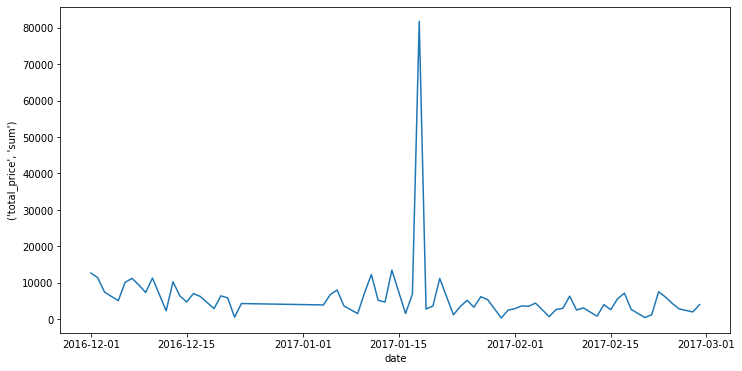

In [42]:
#visualize total revenue based on the date
plt.figure(figsize=(12,6))
sns.lineplot(data=top_date_group, x="date", y=top_date_group['total_price', 'sum'])
plt.show()

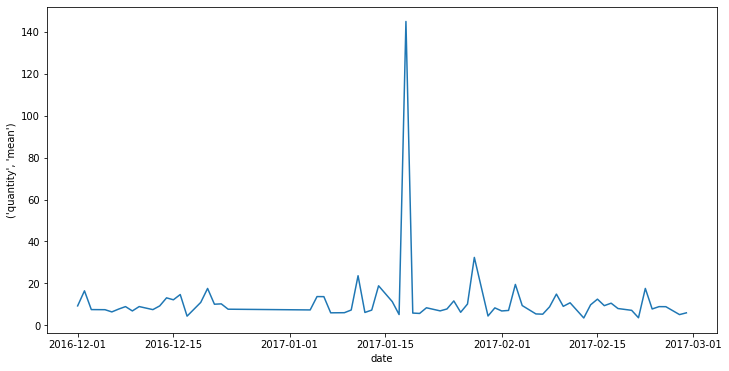

In [43]:
#visualize the number of average purchases based on the date
plt.figure(figsize=(12,6))
sns.lineplot(data=top_date_group, x="date", y=top_date_group['quantity', 'mean'])
plt.show()

In [44]:
#average of revenue on top outlets
top_shop['total_price'].describe()

count    33703.000000
mean        12.811251
std        421.595987
min          0.000000
25%          1.060000
50%          3.960000
75%         10.500000
max      77182.560000
Name: total_price, dtype: float64

In [45]:
#average the number of purchases on top outlets
top_shop['quantity'].describe()

count    33703.000000
mean        11.653206
std        407.090081
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      74214.000000
Name: quantity, dtype: float64

kita bisa lihat pada grafik diatas, bahwa puncak pembelian yang dilakukan customer paling banyak pada tanggal 18-01-2017 dengan jumlah pembelian > 140.

untuk rata-rata jumah pembelian pada periode tersebut yaitu sebanyak 11-12 product dengan pendapatan rata-rata 12-13 dolar. Namun karena terdapat nilai outlier pada data kita juga bisa menggunakan nilai tengan yaitu dengan jumlah rata-rata pembelian pada periode tersebut 3 item dengan pendapatan rata-rata 3-4 dolar.

#### Find out the number of items sold on top outlet

selanjutnya kita akan melihat product apa saja yang paling banyak terjual.

In [46]:
#Count the products sold
top_product_sales = top_shop.groupby('product_id').agg({'quantity':'sum'}).reset_index()
top_product_sales.sort_values(by='quantity', ascending=False)

,product_id,quantity
1674,23166,74214
1746,37413,5577
1976,84077,4259
2308,85123A,3751
351,21212,3335
...,...,...
1691,35591T,1
2421,90070,1
200,20934,1
2119,84795b,1


In [47]:
#looks how the product with the highest sale
df[df['product_id'] =='23166']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
68612,541431,23166,74214,2017-01-18 10:01:00,18025,0,Shop 15,1.04,77182.56,2017-01-18


In [48]:
#looks how the product with the highest sale
df[df['product_id'] =='37413']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
26225,545060,37413,5,2017-02-27 13:47:00,21226,0,Shop 1,0.0,0.0,2017-02-27
31870,542504,37413,5567,2017-01-28 12:03:00,0,0,Shop 0,0.0,0.0,2017-01-28
36209,543300,37413,5,2017-02-07 11:42:00,19013,0,Shop 13,0.0,0.0,2017-02-07
92279,544296,37413,95,2017-02-17 12:47:00,19977,0,Shop 9,0.0,0.0,2017-02-17


Product yang paling banyak terjual yaitu id `23166` dengan banyaknya penjualan 74214 item. Namun ternyata pembeliannya hanya dilakukan oleh satu customer, bisa jadi customers ini adalah reseller. Lalu product yang paling banyak terjual kedua yaitu product`37413` dengan jumlah penjualan 5577 item.

In [49]:
#filtering the data without outliers
Q1 = top_shop['quantity'].quantile(0.25)
Q3 = top_shop['quantity'].quantile(0.75)
IQR = Q3 - Q1

top_shop_out = (top_shop['quantity'] >= Q1 - 1.5 * IQR) & (top_shop['quantity'] <= Q3 + 1.5 *IQR)
top_shop_out = top_shop.loc[top_shop_out]

In [50]:
#Count the products sale without outliers
top_product_sales =top_shop_out.groupby('product_id').agg({'quantity':'sum'}).reset_index()
top_product_sales.sort_values(by='quantity', ascending=False)

,product_id,quantity
2214,85099B,854
1144,22469,839
2231,85123A,830
1585,22961,799
910,22197,701
...,...,...
1951,84465,1
440,21418,1
2089,84906,1
1955,84508A,1


kita tidak bisa menyimpulkan bahwa product id `23166` adalah product yang banyak digandrungi cutomer karena hanya terjual oleh 1 customer, kita bisa menyimpulkan itu sebagai outlier.

Namun setelah kita coba menghapus outlier, kita mendapatkan product id `85099B` yang banyak terjual dan juga banyak dibeli oleh berbagai macam customer dengan total penjual 854 item.

### Analyze data from other outlets with the same parameters

Selanjutnuya kita akan menganalisis outlet-outlet yang lain dengan parameter yang sama

In [51]:
#create new variable that not contain top outlets
shops = df[~df['shop_id'].isin(['Shop 0', 'Shop 1', 'Shop 10', 'Shop 11', 'Shop 12', 'Shop 13',
                             'Shop 14', 'Shop 15', 'Shop 16', 'Shop 17'])]
shops

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72,5.04,2016-12-14
10,537795,82494L,5,2016-12-08 13:03:00,22892,1,Shop 6,2.55,12.75,2016-12-08
13,538533,22294,9,2016-12-13 10:31:00,20475,0,Shop 24,1.06,9.54,2016-12-13
14,545180,22352,5,2017-02-28 14:42:00,18407,0,Shop 18,2.10,10.50,2017-02-28
...,...,...,...,...,...,...,...,...,...,...
104273,538992,22112,4,2016-12-15 11:56:00,21629,0,Shop 21,0.00,0.00,2016-12-15
104277,543815,21123,1,2017-02-13 15:18:00,22934,1,Shop 29,1.25,1.25,2017-02-13
104280,536790,82494L,5,2016-12-02 15:26:00,23529,1,Shop 30,2.55,12.75,2016-12-02
104300,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,0.42,4.62,2016-12-10


#### Find the total customer visit for the other outlets

In [52]:
#find the total visit of customers for each outlets.
total_visit_shops = shops.groupby('shop_id').agg({'customer_id': 'count'}).reset_index()
total_visit_shops.sort_values(by='customer_id', ascending=False)

,shop_id,customer_id
7,Shop 24,2012
3,Shop 20,2008
5,Shop 22,1969
20,Shop 9,1920
14,Shop 30,1913
16,Shop 5,1906
18,Shop 7,1821
11,Shop 28,1813
2,Shop 2,1778
12,Shop 29,1773


In [53]:
#find how many user on each outlets
total_cust = shops.groupby('shop_id').agg({'customer_id': 'nunique'}).sort_values(by='customer_id', ascending=False).reset_index()
total_cust

,shop_id,customer_id
0,Shop 5,114
1,Shop 19,113
2,Shop 22,111
3,Shop 26,111
4,Shop 28,110
5,Shop 9,109
6,Shop 7,109
7,Shop 20,108
8,Shop 24,103
9,Shop 30,102


Outlet Shop 24 paling banyak dikunjungin customer, padahal outlet tersebut hanya memiliki 103 customer. mungkin bisa jadi customernya merasa puas dengan pelayanan di outlet tersebut sehingga mereka datang kembali.

Sedangkan Shop 5 dengan jumlah customer terbanyak hanya dikunjungin 1906 kali oleh customer.

#### Find out the average number of purchases for a certain period on the other outlets

In [54]:
#grouping revenue and the average of puchase based on the date
shop_date_group = shops.groupby('date').agg({'total_price': ['sum','mean'], 'quantity' : 'mean'}).reset_index()
shop_date_group

date total_price              quantity
                       sum       mean       mean
0   2016-12-01    14421.97  16.482251  16.189714
1   2016-12-02    16657.19  16.557843  19.059642
2   2016-12-03     7524.38  15.231538  16.518219
3   2016-12-05     9866.29   8.896564   8.530207
4   2016-12-06    10733.89  11.554241   9.954790
..         ...         ...        ...        ...
63  2017-02-23     6851.86  15.158982  16.345133
64  2017-02-24     8142.24  12.903708  10.786054
65  2017-02-25     9107.81  16.469819  12.880651
66  2017-02-27     3167.10  12.420000  10.180392
67  2017-02-28     5694.76  11.988968  10.486316

[68 rows x 4 columns]

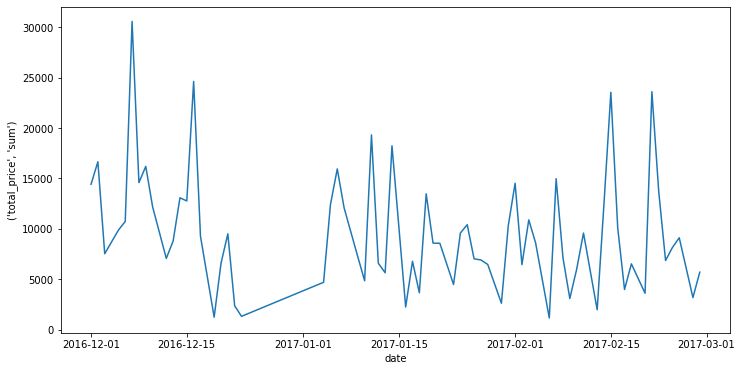

In [55]:
#visualize total revenue based on the date
plt.figure(figsize=(12,6))
sns.lineplot(data=shop_date_group, x="date", y=shop_date_group['total_price', 'sum'])
plt.show()

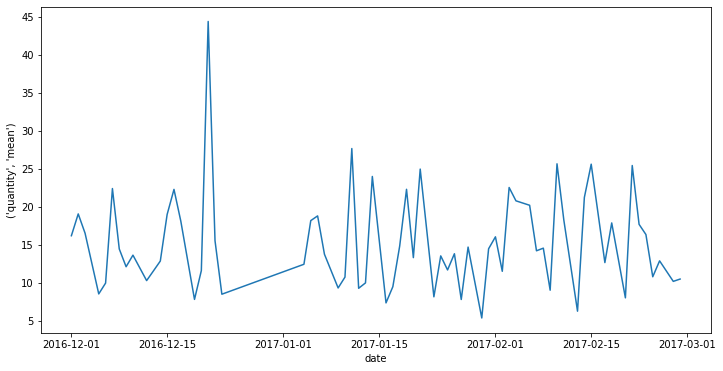

In [56]:
#visualize the number of average purchase based on the date
plt.figure(figsize=(12,6))
sns.lineplot(data=shop_date_group, x="date", y=shop_date_group['quantity', 'mean'])
plt.show()

In [57]:
#find the number of average on quantity
shops['quantity'].mean()

15.18262769281823

In [58]:
#find the number of average of total_price
shops['total_price'].mean()

18.034734105804596

Pada grafik diatas kita bisa lihat pendapatan paling banyak sekitar tanggal 2016-12-08 dengan jumlah pendapatan lebih dari 30ribu dolar, serta product paling banyak terjual sekitar tanggal 2016-12-20 dengan 45 item terjual.

Untuk rata-rata penjualan pada periode tersebut sebanyak 15 item dengan pendapatan rata-rata 18 dolar.

#### Find out the number of items sold on the other outlets

In [59]:
#Count the products sold
shop_product_sales = shops.groupby('product_id').agg({'quantity':'sum'}).reset_index()
shop_product_sales.sort_values(by='quantity', ascending=False)

,product_id,quantity
2259,85123A,6858
1386,22693,6622
336,21212,5990
2247,85099B,5924
1956,84077,5867
...,...,...
221,21003,1
627,21742,1
1514,22828,1
1974,84313C,1


In [60]:
#looks how the product with the highest sale
shops[shops['product_id'] == '85123A']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
92,539317,85123A,3,2016-12-16 19:04:00,23071,1,Shop 25,0.0,0.0,2016-12-16
399,543641,85123A,3,2017-02-10 17:19:00,20234,0,Shop 8,0.0,0.0,2017-02-10
1811,538157,85123A,3,2016-12-09 16:57:00,23255,1,Shop 26,0.0,0.0,2016-12-09
2039,536590,85123A,5,2016-12-01 16:52:00,18744,0,Shop 30,0.0,0.0,2016-12-01
2148,540839,85123A,1,2017-01-11 15:42:00,22470,1,Shop 29,0.0,0.0,2017-01-11
...,...,...,...,...,...,...,...,...,...,...
102161,537301,85123A,3,2016-12-06 11:38:00,21539,0,Shop 24,0.0,0.0,2016-12-06
102478,538312,85123A,5,2016-12-10 13:48:00,22406,1,Shop 30,0.0,0.0,2016-12-10
102580,540800,85123A,31,2017-01-11 12:20:00,19477,0,Shop 20,0.0,0.0,2017-01-11
102875,538707,85123A,4,2016-12-14 10:38:00,23573,1,Shop 25,0.0,0.0,2016-12-14


In [61]:
#looks how the product with the highest sale
shops[shops['product_id'] == '22693']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
164,540838,22693,23,2017-01-11 15:13:00,19541,0,Shop 4,0.94,21.62,2017-01-11
3229,539101,22693,2399,2016-12-16 10:35:00,21708,0,Shop 5,0.94,2255.06,2016-12-16
6587,537441,22693,23,2016-12-06 17:26:00,19243,0,Shop 19,0.94,21.62,2016-12-06
12327,542098,22693,23,2017-01-25 13:04:00,22210,1,Shop 29,0.94,21.62,2017-01-25
21994,543292,22693,47,2017-02-07 11:15:00,20213,0,Shop 6,0.94,44.18,2017-02-07
28525,542534,22693,47,2017-01-28 13:27:00,19386,0,Shop 20,0.94,44.18,2017-01-28
31442,541524,22693,23,2017-01-19 10:49:00,22770,1,Shop 2,0.94,21.62,2017-01-19
34747,539088,22693,95,2016-12-16 09:45:00,18772,0,Shop 9,0.94,89.30,2016-12-16
36411,540992,22693,23,2017-01-12 16:57:00,23043,1,Shop 9,0.94,21.62,2017-01-12
41748,540469,22693,23,2017-01-07 14:04:00,18163,0,Shop 3,0.94,21.62,2017-01-07


pada outlet lainnya product paling banyak pada product_id `85123A` dengan jumlah item 6858. lalu kedua pada product_id `22693` dengan jumlah 6622 item.

## Member and non-member loyalty program behavior

kita akan melihat perilaku bagaimana perilaku member dan non member loyalty program.

### loyalty program's behavior

In [62]:
#create a new variable for loyalty program member
member = df[df['loyalty_program'] == 1]
member

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,0.72,5.04,2016-12-14
10,537795,82494L,5,2016-12-08 13:03:00,22892,1,Shop 6,2.55,12.75,2016-12-08
20,543808,21094,3,2017-02-13 13:22:00,23133,1,Shop 8,0.64,1.92,2017-02-13
31,543040,22550,1,2017-02-02 17:06:00,23016,1,Shop 1,0.00,0.00,2017-02-02
35,537077,72598,3,2016-12-05 11:59:00,22741,1,Shop 30,0.85,2.55,2016-12-05
...,...,...,...,...,...,...,...,...,...,...
104259,538354,48138,5,2016-12-10 15:45:00,22552,1,Shop 30,6.75,33.75,2016-12-10
104275,538370,22314,1,2016-12-12 11:06:00,22602,1,Shop 11,2.95,2.95,2016-12-12
104277,543815,21123,1,2017-02-13 15:18:00,22934,1,Shop 29,1.25,1.25,2017-02-13
104280,536790,82494L,5,2016-12-02 15:26:00,23529,1,Shop 30,2.55,12.75,2016-12-02


In [63]:
#looks into the distibution data
member.describe()

,quantity,customer_id,loyalty_program,price_per_one,total_price
count,17387.000000,17387.000000,17387.0,17387.000000,17387.000000
mean,13.420717,23020.757923,1.0,1.900043,15.472615
std,63.720937,521.274455,0.0,3.434120,82.453405
min,1.000000,22005.000000,1.0,0.000000,0.000000
25%,2.000000,22595.000000,1.0,0.420000,1.650000
50%,5.000000,23041.000000,1.0,1.250000,6.300000
75%,11.000000,23478.000000,1.0,2.550000,12.750000
max,3905.000000,23962.000000,1.0,175.000000,3821.620000


In [64]:
#looks into varians data
np.var(member)

quantity             4060.124315
customer_id        271711.429694
loyalty_program         0.000000
price_per_one          11.792504
total_price          6798.172903
dtype: float64

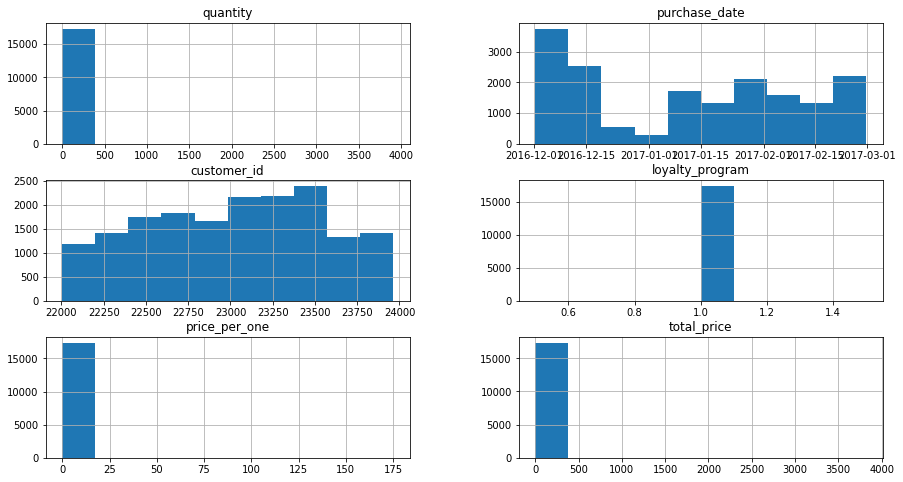

In [65]:
#visualize with histogram
member.hist(figsize= (15,8), bins= 10)
plt.show()

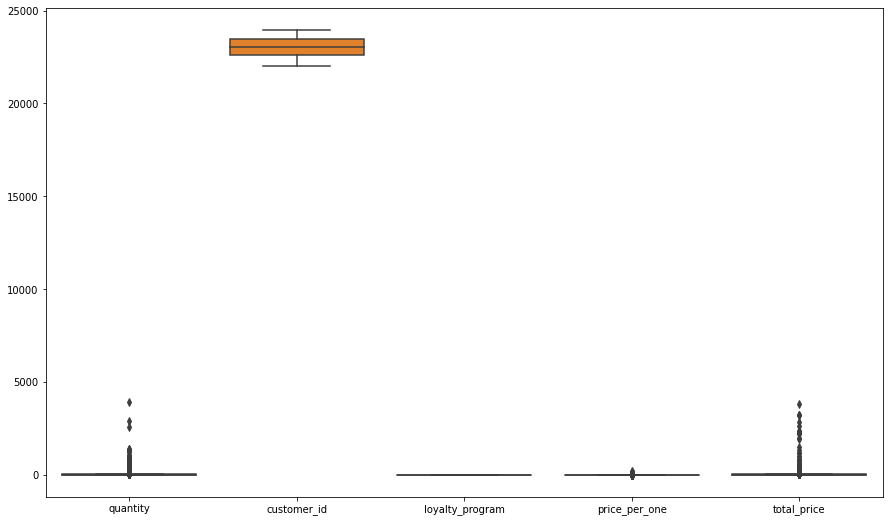

In [66]:
#visualize the data with boxplot
plt.figure(figsize= (15,9))
sns.boxplot(data=member)
plt.show()

pada distribusi data member loyalty program, rata-rata pendapatan yang dihasilkan 15 dolar dengan rata-harga perproduk nya yaitu 1-2 dolar. ini bisa diartikan bahwa setiap user membeli produk lebih dari 1 item. dilihat dari histogram dan boxplot diatas juga menujukkan adanya outlier yang menandakan banyaknya user yang membeli produk secara ekstrem sehingga mempunya kemiringan positif.

### non-loyalty program's behaviour

In [67]:
#create a new variable for non-loyalty program member
non_member = df[df['loyalty_program'] == 0]
non_member

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,total_price,date
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62,2016-12-10
7,541424,79321,1,2017-01-17 17:57:00,0,0,Shop 0,0.00,0.00,2017-01-17
11,541696,22197,4,2017-01-20 18:08:00,0,0,Shop 0,0.72,2.88,2017-01-20
12,543647,21987,3,2017-02-10 19:49:00,18520,0,Shop 17,0.53,1.59,2017-02-10
13,538533,22294,9,2016-12-13 10:31:00,20475,0,Shop 24,1.06,9.54,2016-12-13
...,...,...,...,...,...,...,...,...,...,...
104295,537886,22158,7,2016-12-09 09:49:00,21339,0,Shop 13,0.00,0.00,2016-12-09
104296,540154,22134,3,2017-01-05 11:30:00,0,0,Shop 0,0.42,1.26,2017-01-05
104297,538566,21826,1,2016-12-13 11:21:00,0,0,Shop 0,1.25,1.25,2016-12-13
104300,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,0.42,4.62,2016-12-10


In [68]:
#looks into the distribution data
non_member.describe()

,quantity,customer_id,loyalty_program,price_per_one,total_price
count,52477.000000,52477.000000,52477.0,52477.000000,52477.000000
mean,13.499647,13831.558759,0.0,1.816003,15.528884
std,327.818303,9202.652142,0.0,3.056163,341.387504
min,1.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.0,0.420000,1.440000
50%,5.000000,18877.000000,0.0,1.250000,5.950000
75%,11.000000,20424.000000,0.0,2.460000,12.750000
max,74214.000000,22000.000000,0.0,145.000000,77182.560000


In [69]:
#looks into varians data
np.var(non_member)

quantity           1.074628e+05
customer_id        8.468719e+07
loyalty_program    0.000000e+00
price_per_one      9.339952e+00
total_price        1.165432e+05
dtype: float64

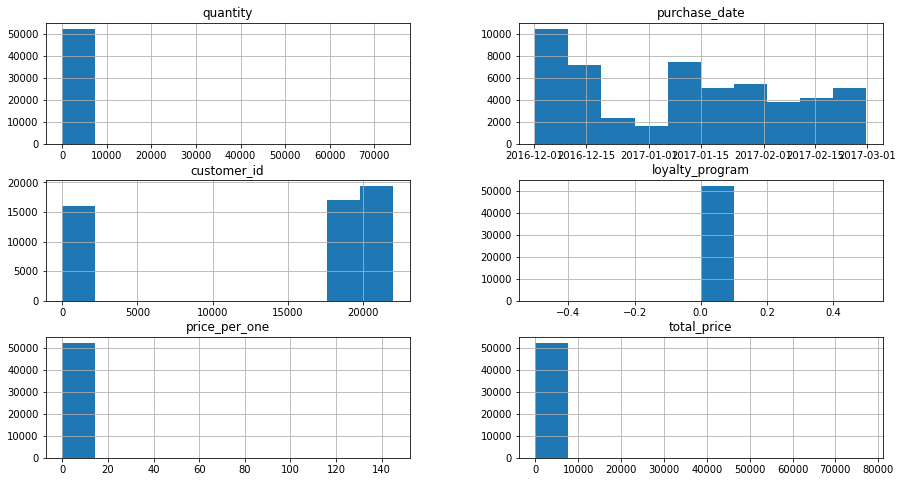

In [70]:
#visualize the data with histogram
non_member.hist(figsize= (15,8), bins= 10)
plt.show()

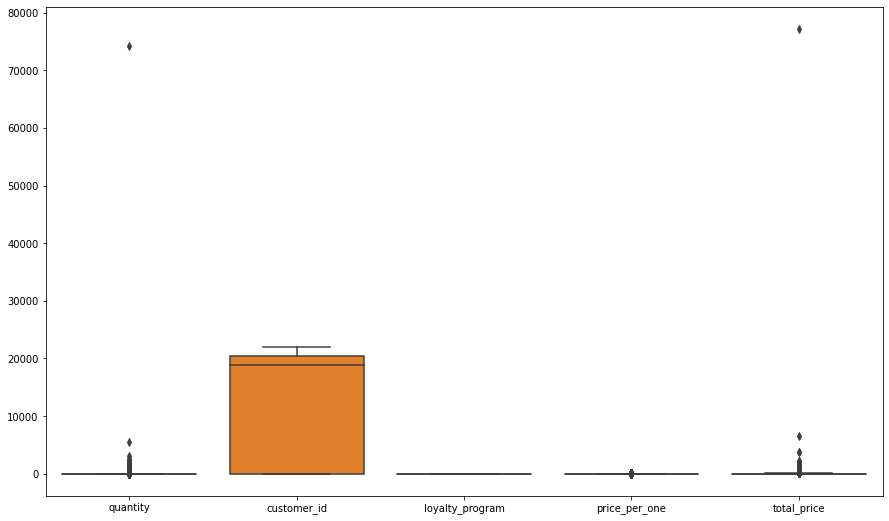

In [71]:
#visualize the data with boxplot
plt.figure(figsize= (15,9))
sns.boxplot(data=non_member)
plt.show()

pada distribusi data non-member loyalty program, rata-rata pendapatan yang dihasilkan 15 dolar dengan rata-harga perproduk nya yaitu 1-2 dolar, ini tidak jauh beda dengan rata-rata yang dihasilkan oleh member loyalty program. dilihat dari histogram dan boxplot diatas juga menujukkan adanya outlier yang menandakan banyaknya user yang membeli produk secara ekstrem sehingga mempunya kemiringan positif. lalu diloihat dari histogram dan boxplotnya juga ada customer yang membeli product dengan quantity yang sangat banyak sehingga mengahasilkan outlier yang menyebabkan histogram mempunya kemiringan positif.

## Hypothesis testing

Pada steps ini kita akan melakukan uji hipotesis untuk mengetahui apakah ada perbedaan pada pembelian rata-rata program loyalty dan non program loyalty. tujuannya untuk mengetahui apakah program tersebut berpengaruh pada besarnya pendapatan yang dihasilkan.

Uji hipotesis ini menggunakan metode t-test independen karena kita akan mencari perbedaan rata-rata, serta menggunakan tingkat signifikansi sebesar 5% atau 0.05.

Hasil yang didapat dari pengujian hipotesis ini adalah:
- jika p value < alpha maka kita menolak hipotesis null (H0) yang artinya rata-rata pembelian yang dilakukan oleh member loyalty program dan Non-member adalah TIDAK SAMA.
- jika p value > aplha maka kita tidak dapat menolak hipotesis null yang artinya kita menerima H0 dimana rata-rata pembelian yang dilakukan oleh member loyalty program dan Non-member adalah SAMA.

H0 : Rata-rata pembelian yang dilakukan oleh member loyalty program dan Non-member adalah SAMA

H1 : Rata-rata pembelian yang dilakukan oleh member loyalty program dan Non-member adalah TIDAK SAMA

In [72]:
#hypothesis testing with ttest method and significance level of 5%
alpha = 0.05
results = st.ttest_ind(member['quantity'], non_member['quantity'] ,equal_var=False)
results.pvalue

0.9583237071482961

In [73]:
#looks the results of hypothesis test
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita tidak dapat menolak hipotesis nol


In [74]:
#average quantity on member loyalty program
member['quantity'].mean()

13.420716627365273

In [75]:
#average quantity on non-member loyalty program
non_member['quantity'].mean()

13.499647464603541

Hipotesis menujukkan hasil bahwa kita tidak dapat menolak H0 yang artinya rata-rata pembelian yang dilakukan oleh member dan non-member program loyalty tidak memiliki perbedaan (sama). Memang jika dilihat dari rata-ratanya punya member memiliki rata-rata 13.42 dan non-member 13,49. ini memang tidak jauh berbeda bahkan jika kita bulatkan pun hasil dari rata-rata keduanya adalah sama yaitu 13 item.

bagaimana dengan rata-rata pendapatan yang dilakuakn oleh program member dan non meber loyalty program? mari kita lakukan 1 kali lagi uji hipotesis pada rata-rata jumlah pendapatan.

H0 : Rata-rata pendapatan yang dilakukan oleh member loyalty program dan Non-member adalah SAMA

H1 : Rata-rata pendapatan yang dilakukan oleh member loyalty program dan Non-member adalah TIDAK SAMA

In [76]:
#hypothesis testing with ttest method and significance level of 5%
alpha = 0.05
results = st.ttest_ind(member['total_price'], non_member['total_price'] ,equal_var=False)
results.pvalue

0.972225935225211

In [77]:
#looks the results of hypothesis test
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita tidak dapat menolak hipotesis nol


In [78]:
#average total_price on member loyalty program
member['total_price'].mean()

15.472615172255132

In [79]:
#average total_price on non-member loyalty program
non_member['total_price'].mean()

15.528883891990777

Hipotesis pada rata-rata pendapatan yang dihasilkan program member dan non-member juga menujukkan hasil bahwa kita tidak dapat menolak H0 yang artinya rata-rata pembelian yang dilakukan oleh member dan non-member program loyalty tidak memiliki perbedaan (sama). Memang jika dilihat dari rata-ratanya member memiliki rata-rata 15,47 dan non-member 15,52. ini memang tidak jauh berbeda bahkan jika kita bulatkan pun hasil dari rata-rata keduanya adalah sama yaitu 15

## Conclucion

Dari hasil analisis diatas kita bisa simpulkan bahwa:
   
1. Pada data terdapat 30 outlets, untuk menganalisisnya kita membagi menjadi 2 group. group pertama group yaitu 10 outlets dengan pendapatan terbesar (top outlets) dan sisanya masuk pada group ke dua. kita juga menganalisis customers yang terdaftar pada member loyalty program dan non-member.
2. Outlet yang paling banyak mendapatkan pendapatan yaitu dari outlet ke 15 (Shop 15) dengan total pendapatan 112186.68 dolar, dan yang paling sedikit ada di Shop 21 dengan totla pendapatan 18758.24 dolar.
3. Untuk pendapatan berdasarkan member loyalty program, customer dengan member mengumpulkan 269022.36 dolar sedangkan non-member mendapat 814909.24 dolar penghasilan. banyaknya pendapatan yang dihasilkan oleh customer non member dikarenakan memang jumlah non member lebih besar dari cutomer member.
4. Lalu untuk pendapatan paling tinggi di dapat pada tanggal `2017-01-18` sebesar 85314.88 dolar.
5. Product paling banyak terjual ada pada produk id `23166` dengan total penjualan 74214 item dan produk id `85123A` dengan 10609 item. namun seperti yang kita ketahui terdapat nilai outlier pada data dimana terdapat customer yang membeli produk secara ekstrem sehingga memunculkan kemiringan positif. setelah outlier dihapus, kita mendapati produk id `21212` dengan penjualan terbanyak yaitu 2999 item, dan produk id `85123A` masih termasuk produk yang paling banyak terjual.
6. Hasil analisis member loyalty program memang terdapat outlier yang artinya terdapat customer yang memembeli produk secara ekstrem(sangat banyak). namun, nilai outlier tersebut tidak sebesar yang ada pada non-member.
7. Hasil uji hipotesis mununjukkan pembelian rata-rata dan pendapatan rata-rata yang dilakukan oleh member dan non-member loyalty program tidak memiliki perbedaan (sama).

## Recommendation

Beberapa rekomendasi yang bisa saya berikan dari hasil analisis ini:

1. menjadikan customer yang membeli produk dengan jumlah pembelian yang banyak sebagai bagian dari member loyalty program.
2. menarik pelanggan dengan memberikan discount untuk yang membeli dengan jumlah tertentu.
3. memberikan discount menarik untuk member loyalty program agar mereka tetap loyal terhadap kita.

## Presentation Link

**https://drive.google.com/file/d/1fuFBfN6Dlu5qdyf98szNNHEm2Qwjpd0g/view?usp=sharing**

## Dashboard Link

In [80]:
#save data to csv
df.to_csv('product_dataset_us.csv')

**https://public.tableau.com/views/Revenueoftheoutlets/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link**